## BUSINESS PROBLEM

### As the number of cars is growing and consequently more car accidents occur, prevention of the car accidents has become important in the modern society. Car accident kills or injures people, damages vehicles, buildings, goods, or suffer a material loss. What can we do to decrease its occurrence?

### Information technologies have been rapidly developed in recent decades. Large volumes of data are being collected, stored and analyzed to make different processes more efficient. Minimization of quantity of car incidents and their severity is also the area for applying different data science techniques.

### It is very important for society to decrease number of collisions and lower damage to people and property. As a result, state organizations responsible for traffic safety are key stakeholders in this business problem. Using results derived from car collisions data analysis, they will be able to make changes in traffic regulation, adding new road signs and crossroads to improve traffic safety.

### To solve this business problem we need to acquire detailed data about car collisions, prepare data for further analysis, choose proper data analysis tool and construct the model which allows to determine key factors responsible for road incidents and produce warning signals when some critical conditions appear.

### This predictive model will be deployed in systems used in traffic regulation processes and will estimate current traffic, weather and other conditions around road network to produce recommendations which preventive actions to be made to minimize the quantity of cars collisions and their severity.

## DATA

### Seattle Police Department (SPD) has been collecting detailed data about cars collisions. It will be used for developing model that allows to determine locations, weather conditions, days of week, time of day and other factors that are helpful for car collisions prediction.

### the dataset is available at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

### File with metadata is available at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

### We start for uploading data and analysis of data structure

In [27]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

In [2]:
df.shape

(194673, 38)

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

### Severity code variable is the target variable. It contains only two categories: 1 - Property Damage Only Collision, 2 - Injury Collision

In [5]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

### Independent variables include: location type (ADDRTYPE, JUNCTIONTYPE), date of incident (INCDATE), driver's intoxication (UNDERINFL), weather, road and light conditions (WEATHER, ROADCOND and LIGHTCOND). These variables will be used to predict severity code of car collissions and identify locations where some preventive meaures to be made and road/light/whather conditions when to exercise caution. 

In [28]:
df1=df[['ADDRTYPE','INCDATE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','SEVERITYCODE']]

In [7]:
df1.shape

(194673, 8)

### All raws with missing data will be deleted. The dataset contains almost 200,000 records and deleting of 15% of data will not affect results

In [8]:
missing_data = df1.isnull()
missing_data.head(5)

,ADDRTYPE,INCDATE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,JUNCTIONTYPE,SEVERITYCODE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [9]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INCDATE
False    194673
Name: INCDATE, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64



In [29]:
df1.dropna(axis=0,inplace=True)

In [30]:
df1.shape

(182914, 8)

### Additional check for data consistency discovered that records with "Other" and "Unknown" data has to be deleted as well

In [12]:
for column in ['ADDRTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE']:
    print(column)
    print(df1[column].value_counts())
    print('')

ADDRTYPE
Block           119366
Intersection     63313
Alley              235
Name: ADDRTYPE, dtype: int64

UNDERINFL
N    94974
0    78942
Y     5021
1     3977
Name: UNDERINFL, dtype: int64

WEATHER
Clear                       109065
Raining                      32649
Overcast                     27189
Unknown                      11637
Snowing                        881
Other                          746
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

ROADCOND
Dry               122159
Wet                46720
Unknown            11521
Ice                 1178
Snow/Slush           978
Other                123
Standing Water       108
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64

LIGHTCOND
Daylight                    113850
Dark - Street Lights On      47550
Unknown                      10448
Dusk  

In [31]:
df1.replace(['Unknown','Other'], np.nan, inplace=True)

In [32]:
df1.dropna(axis=0,inplace=True)

In [33]:
df1.shape

(167335, 8)

### Data in column 'UNDERINFL' has to be amended

In [34]:
df1['UNDERINFL'].replace('0','N',inplace=True)
df1['UNDERINFL'].replace('1','Y',inplace=True)

### Conversion of INCDATE to days of week

In [35]:
df1['INCDATE']=pd.to_datetime(df1['INCDATE'])

In [36]:
df1['WDAY'] = df1['INCDATE'].dt.dayofweek

In [20]:
df1['WDAY'].replace([0,1,2,3],'WORK',inplace=True)
df1['WDAY'].replace([4,5,6],'WEND',inplace=True)

### Independent variables have to be visually checked if they differ for severity codes

In [21]:
def pbar(df,i):
    plt.rcParams.update({'font.size': 10})
    fig = plt.figure()
    ax = df.T.plot(kind='bar',
                    figsize=(6, 4),
                    width = 0.8,
                    color=['#5cb85c','#5bc0de']
                   )
    ax.set_title(i, fontsize=12)
    ax.set_xticklabels(df.columns,fontsize=10)
    ax.legend(fontsize=10)
    plt.show()

<Figure size 432x288 with 0 Axes>

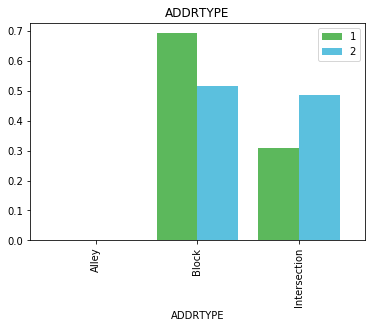

<Figure size 432x288 with 0 Axes>

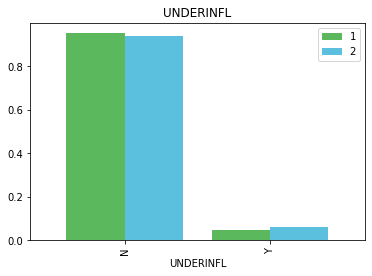

<Figure size 432x288 with 0 Axes>

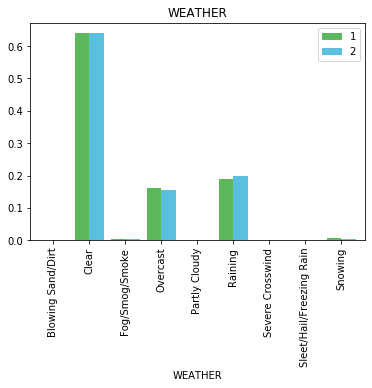

<Figure size 432x288 with 0 Axes>

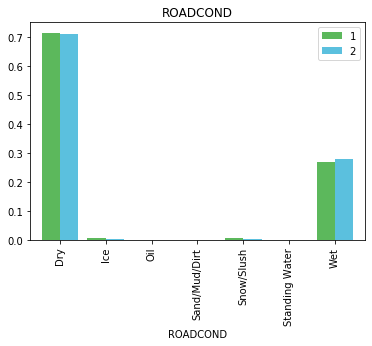

<Figure size 432x288 with 0 Axes>

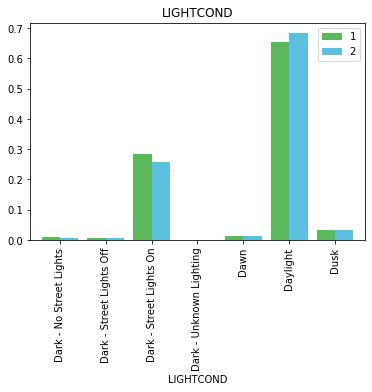

<Figure size 432x288 with 0 Axes>

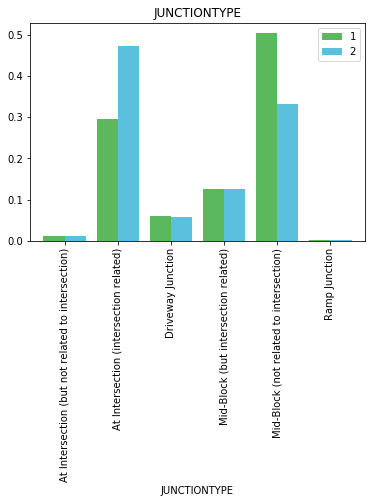

<Figure size 432x288 with 0 Axes>

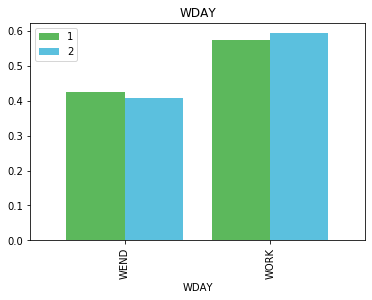

In [23]:
import matplotlib.pyplot as plt
for i in ['ADDRTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','WDAY']:
    df2 = pd.pivot_table(df1, values='INCDATE', index=['SEVERITYCODE'],
                    columns=[i], aggfunc='count')
    df3= df2.div(pd.Series(df2.sum(axis=1).values, index=[1, 2]), axis='index')
    pbar(df3,i)

### Variables ADDRTYPE, LIGHTCOND, JUNCTIONTYPE and WDAY are selected for using in a model after visual check.

In [37]:
df2 = df1[['ADDRTYPE','LIGHTCOND','JUNCTIONTYPE','WDAY','SEVERITYCODE']]

## MODEL DEVELOPMENT

### In this section we select model with the highest accuracy score. Supervised models will be estimated: K-Nearest Neighbors, Logistic Regression and Support Vector Machines.

### All variables will be factorized

In [38]:
ADDRTYPE = df2['ADDRTYPE'].value_counts().index.to_list()
LIGHTCOND = df2['LIGHTCOND'].value_counts().index.to_list()
WDAY = df2['WDAY'].value_counts().index.to_list()
JUNCTIONTYPE = df2['JUNCTIONTYPE'].value_counts().index.to_list()
df2['ADDRTYPE']=pd.factorize(df2['ADDRTYPE'])[0]
df2['LIGHTCOND']=pd.factorize(df2['LIGHTCOND'])[0]
df2['WDAY']=pd.factorize(df2['WDAY'])[0]
df2['JUNCTIONTYPE']=pd.factorize(df2['JUNCTIONTYPE'])[0]

In [39]:
df2.head()

,ADDRTYPE,LIGHTCOND,JUNCTIONTYPE,WDAY,SEVERITYCODE
0,0,0,0,0,2
1,1,1,1,0,1
2,1,0,1,1,1
3,1,0,1,2,1
4,0,0,0,0,2


### Data for learing and testing will be prepared

In [40]:
X = df2[['ADDRTYPE', 'LIGHTCOND', 'JUNCTIONTYPE','WDAY']].values  #.astype(float)
X[0:5]

array([[0, 0, 0, 0],
       [1, 1, 1, 0],
       [1, 0, 1, 1],
       [1, 0, 1, 2],
       [0, 0, 0, 0]], dtype=int64)

In [41]:
y = df2['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [42]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

### K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics

In [45]:
Ks = 12
mean_acc = np.zeros((Ks-1))
for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

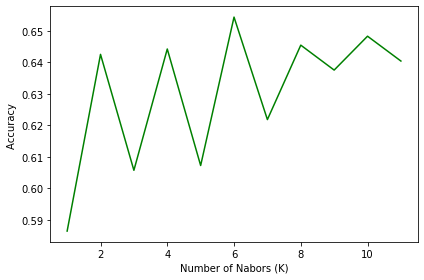

In [46]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### The higest accuracy of K-Nearest Neighbors algorithm with k=6

In [47]:
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat=neigh.predict(X_test)
KN_fsc = f1_score(y_test, yhat, average='weighted') 
KN_jc = jaccard_similarity_score(y_test, yhat)

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [56]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
LR_acc = np.zeros(5)
i = 0
for n in solver:
    LR = LogisticRegression(C=0.01, class_weight = 'balanced',solver=n).fit(X_train,y_train)
    yhat = LR.predict(X_test)
    LR_acc[i] = metrics.accuracy_score(y_test, yhat)
    i+=1

In [79]:
for i in range(5):
    print(solver[i], '= ', round(LR_acc[i],3))

newton-cg =  0.622
lbfgs =  0.622
liblinear =  0.622
sag =  0.622
saga =  0.622


In [58]:
LR_fsc = f1_score(y_test, yhat, average='weighted') 
LR_jc = jaccard_similarity_score(y_test, yhat)

### SVM

In [61]:
from sklearn import svm
kernel = ['linear','poly','rbf','sigmoid']

In [62]:
SVM_acc = np.zeros(4)
for i in range(4):
    clf = svm.SVC(kernel=kernel[i])
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    SVM_acc[i] = metrics.accuracy_score(y_test, yhat)

In [80]:
for i in range(4):
    print(kernel[i], '= ', round(SVM_acc[i],3))

linear =  0.668
poly =  0.668
rbf =  0.668
sigmoid =  0.578


In [65]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
yhat = clf.predict(X_test)

In [66]:
SVM_fsc = f1_score(y_test, yhat, average='weighted') 
SVM_jc = jaccard_similarity_score(y_test, yhat)

In [82]:
rep = pd.DataFrame({'Algorithm':['KNN', 'SMV', 'LR'], 'Jaccard':[0,0, 0],'F1 score':
                   [0,0,0], 'Average':[0,0,0]})
rep.set_index('Algorithm',inplace=True)

In [83]:
rep.loc['KNN','F1 score']=round(KN_fsc,3) 
rep.loc['KNN','Jaccard']=round(KN_jc,3)
rep.loc['KNN','Average']=round((KN_jc+KN_fsc)/2,3)
rep.loc['SMV','F1 score']=round(SVM_fsc,3) 
rep.loc['SMV','Jaccard']=round(SVM_jc,3)
rep.loc['SMV','Average']=round((SVM_jc+SVM_fsc)/2,3)
rep.loc['LR','F1 score']=round(LR_fsc,3) 
rep.loc['LR','Jaccard']=round(LR_jc,3)
rep.loc['LR','Average']=round((LR_jc+LR_fsc)/2,3)
rep

,Jaccard,F1 score,Average
Algorithm,,,
KNN,0.654,0.573,0.614
SMV,0.578,0.575,0.576
LR,0.622,0.627,0.624


### Logistic regression model has the highest average accuracy and will be used to identify the combination of factors that allows predict the severity of car collisions.